In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

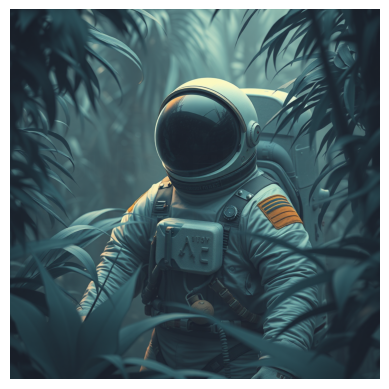

In [2]:
image_path = "/content/astronaut2.png"
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)
plt.show()

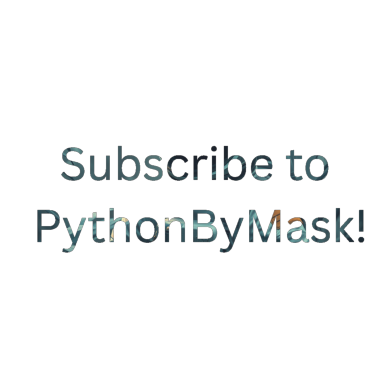

In [3]:
if img.mode != 'RGBA':
    img = img.convert('RGBA')

img_array = np.array(img)
alpha_mask = (img_array[:, :, 3] == 254)

hidden_text_array = np.zeros_like(img_array)
hidden_text_array[alpha_mask] = img_array[alpha_mask]
hidden_text = Image.fromarray(hidden_text_array)
plt.axis('off')
plt.imshow(hidden_text)
plt.show()

Image loaded as RGBA array with shape: (1024, 1024, 4)
Data type of the array: uint8


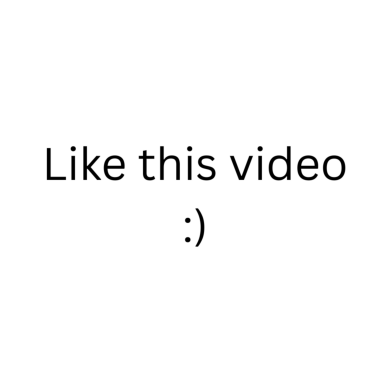

In [4]:
from PIL import Image
import numpy as np
import requests

image_path = "/content/2.png"
img = Image.open(image_path)

if img.mode != 'RGBA':
    img = img.convert('RGBA')

img_array = np.array(img)
print("Image loaded as RGBA array with shape:", img_array.shape)
print("Data type of the array:", img_array.dtype)

plt.axis('off')
plt.imshow(img)
plt.show()

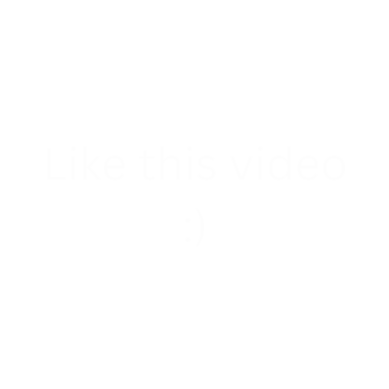

In [8]:
transparent_img_array = img_array.copy()
white_pixels = np.all(transparent_img_array[:, :, :3] == [255, 255, 255], axis=-1)

transparent_img_array[white_pixels, 3] = 0
non_white_pixels = ~white_pixels
transparent_img_array[non_white_pixels, 3] = 2
transparent_img = Image.fromarray(transparent_img_array)

plt.axis('off')
plt.imshow(transparent_img)
plt.show()

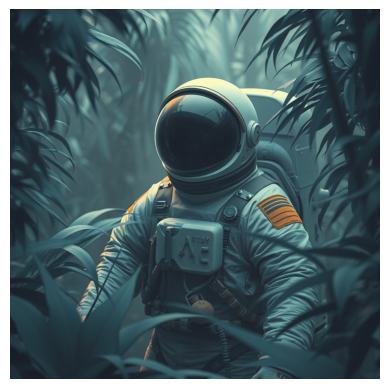

In [9]:
background_image_path = "/content/astronaut.png"
background_img = Image.open(background_image_path).convert('RGBA')

overlayed_img = Image.alpha_composite(background_img, transparent_img)
overlayed_img_array = np.array(overlayed_img)
overlayed_img_array[non_white_pixels, 3] = 254
overlayed_img = Image.fromarray(overlayed_img_array)

plt.axis('off')
plt.imshow(overlayed_img)
plt.show()

In [10]:
# Save the image with hiddenn text
overlayed_img.save("/content/astronaut3.png")
print("Image saved.")

Image saved.


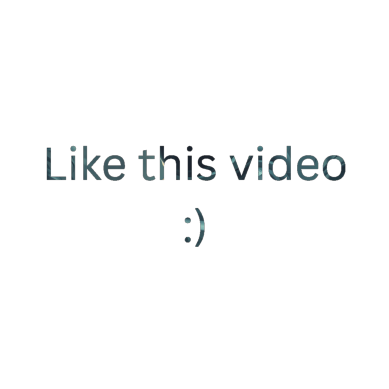

In [11]:
from PIL import Image
import numpy as np
import requests

image_path = "/content/astronaut3.png"
img = Image.open(image_path)

if img.mode != 'RGBA':
    img = img.convert('RGBA')

img_array = np.array(img)
alpha_mask = (img_array[:, :, 3] == 254)

hidden_text_array = np.zeros_like(img_array)
hidden_text_array[alpha_mask] = img_array[alpha_mask]
hidden_text = Image.fromarray(hidden_text_array)

plt.axis('off')
plt.imshow(hidden_text)
plt.show()